In [1]:
from sklearn.datasets import fetch_olivetti_faces
faces =  fetch_olivetti_faces()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
faces.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

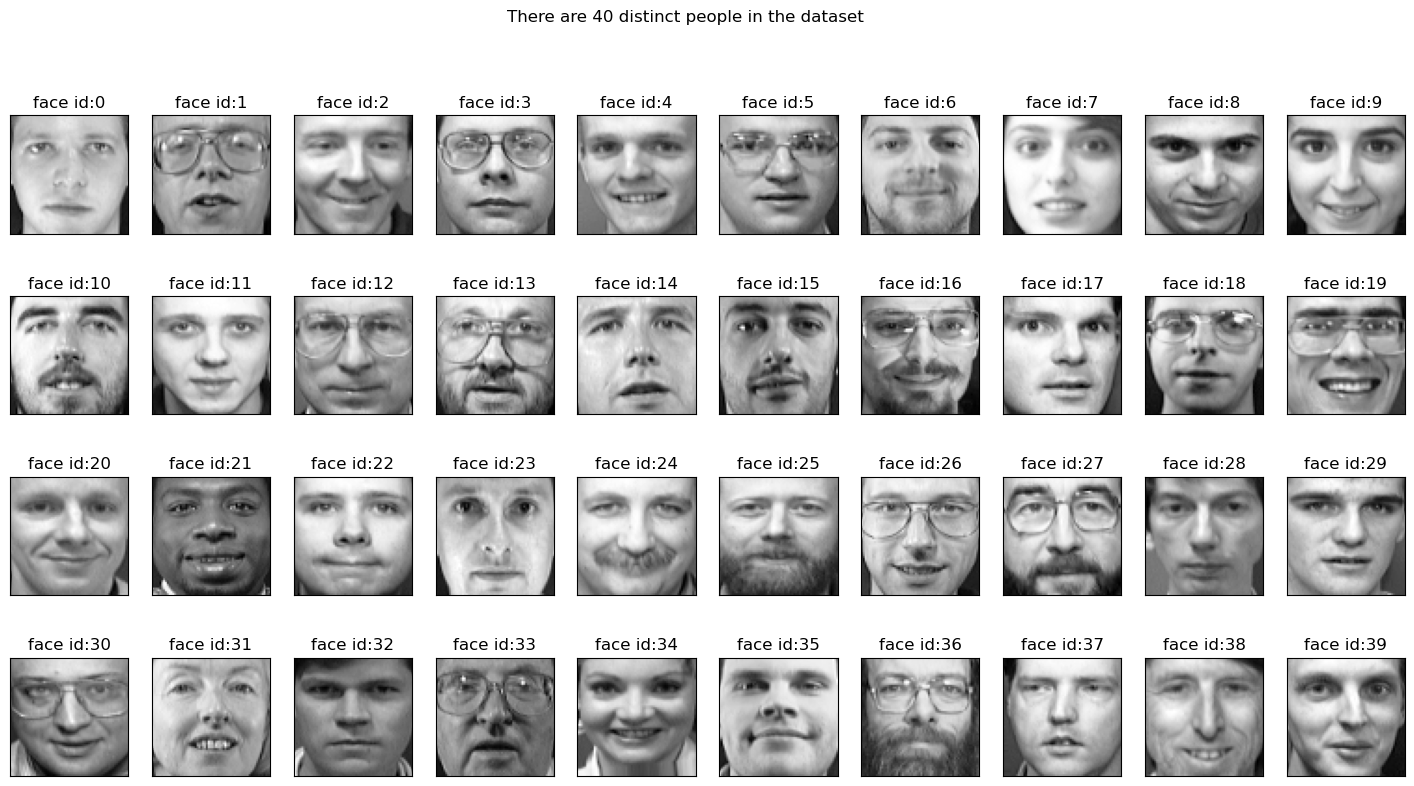

In [3]:
def show_40_distinct_people(images, unique_ids):
    fig, axarr=plt.subplots(nrows=4, ncols=10, figsize=(18, 9))
    axarr=axarr.flatten()
    for unique_id in unique_ids:
        image_index=unique_id*10
        axarr[unique_id].imshow(images[image_index], cmap='gray')
        axarr[unique_id].set_xticks([])
        axarr[unique_id].set_yticks([])
        axarr[unique_id].set_title("face id:{}".format(unique_id))
    plt.suptitle("There are 40 distinct people in the dataset")
    
show_40_distinct_people(faces.images, np.unique(faces.target))

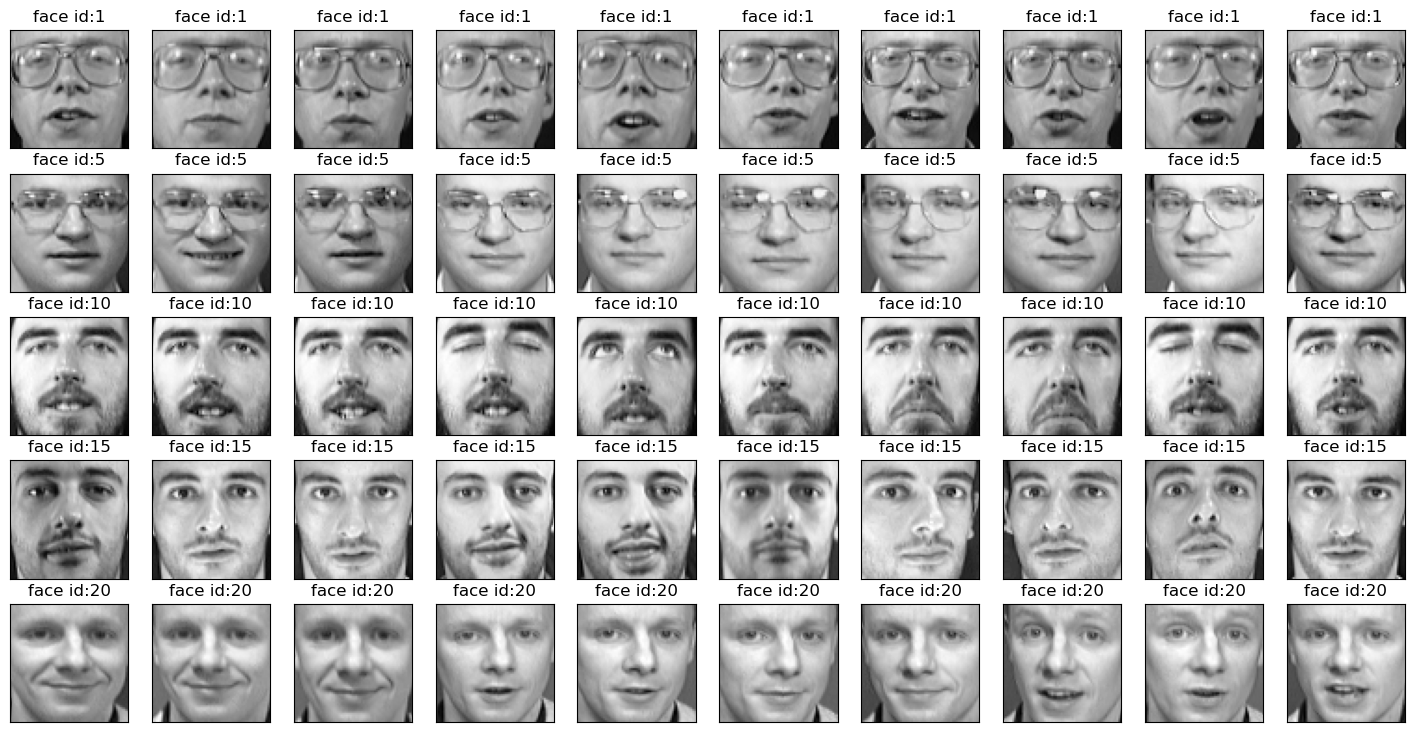

In [4]:
def show_10_faces_of_n_subject(images,subject_ids):
    cols = 10
    rows = (len(subject_ids)*10)//cols
    fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))
    for i, subject_id in enumerate(subject_ids):
        for j in range(cols):
            image_index = subject_id*10 + j
            ax[i,j].imshow(images[image_index], cmap="gray")
            ax[i,j].set_xticks([])
            ax[i,j].set_yticks([])
            ax[i,j].set_title("face id:{}".format(subject_id))
show_10_faces_of_n_subject(images=faces.images, subject_ids = [1,5,10,15,20])

In [5]:
X = faces.images.reshape((faces.images.shape[0], -1))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, faces.target, test_size = 0.2, stratify=faces.target, random_state=0)

In [7]:
print("X_train shape:",X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (320, 4096)
y_train shape:(320,)


In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
x_pca = pca.transform(X)

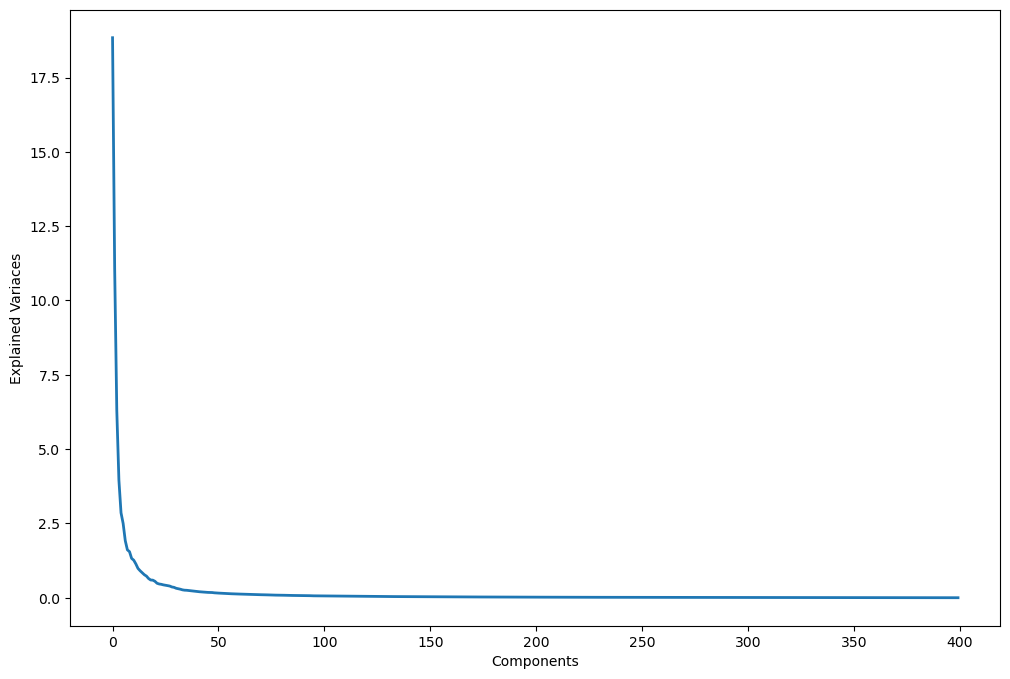

In [11]:
pca=PCA()
pca.fit(X)
plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [13]:
n_components = 90
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

In [14]:
number_of_eigenfaces=len(pca.components_)
eigen_faces=pca.components_.reshape((number_of_eigenfaces, faces.images.shape[1], faces.images.shape[2]))

In [15]:
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [17]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.94
